In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import PCA

In [4]:
gList = ['FKH1', 'GCN5', 'MED4', 'OPI1', 'RFX1', 'RGR1', 'RPD3', 'SPT3', 'TFC7', 'YAP6']

In [5]:
df = pd.read_csv("../data/combination_demo.csv")

In [10]:
df["Combination"] = df["Combination"].str.split("-")

In [11]:
df

,Combination,FoldChange
0,[PosCtrl],1.000002
1,[FKH1],2.128433
2,"[FKH1, GCN5]",5.157823
3,"[FKH1, GCN5, MED4]",5.029117
4,"[FKH1, GCN5, OPI1]",2.425280
...,...,...
171,"[SPT3, YAP6]",1.342010
172,"[SPT3, YAP6, TFC7]",1.364580
173,[TFC7],1.310550
174,[YAP6],1.357042


In [12]:
for g in gList:
    df[g] = 0

In [13]:
df

,Combination,FoldChange,FKH1,GCN5,MED4,OPI1,RFX1,RGR1,RPD3,SPT3,TFC7,YAP6
0,[PosCtrl],1.000002,0,0,0,0,0,0,0,0,0,0
1,[FKH1],2.128433,0,0,0,0,0,0,0,0,0,0
2,"[FKH1, GCN5]",5.157823,0,0,0,0,0,0,0,0,0,0
3,"[FKH1, GCN5, MED4]",5.029117,0,0,0,0,0,0,0,0,0,0
4,"[FKH1, GCN5, OPI1]",2.425280,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
171,"[SPT3, YAP6]",1.342010,0,0,0,0,0,0,0,0,0,0
172,"[SPT3, YAP6, TFC7]",1.364580,0,0,0,0,0,0,0,0,0,0
173,[TFC7],1.310550,0,0,0,0,0,0,0,0,0,0
174,[YAP6],1.357042,0,0,0,0,0,0,0,0,0,0


In [14]:
for i in range(len(df)):
    #print(i)
    for j in df["Combination"][i]:
        df.loc[i, j] = 1

In [15]:
df

,Combination,FoldChange,FKH1,GCN5,MED4,OPI1,RFX1,RGR1,RPD3,SPT3,TFC7,YAP6,PosCtrl
0,[PosCtrl],1.000002,0,0,0,0,0,0,0,0,0,0,1.0
1,[FKH1],2.128433,1,0,0,0,0,0,0,0,0,0,NaN
2,"[FKH1, GCN5]",5.157823,1,1,0,0,0,0,0,0,0,0,NaN
3,"[FKH1, GCN5, MED4]",5.029117,1,1,1,0,0,0,0,0,0,0,NaN
4,"[FKH1, GCN5, OPI1]",2.425280,1,1,0,1,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,"[SPT3, YAP6]",1.342010,0,0,0,0,0,0,0,1,0,1,NaN
172,"[SPT3, YAP6, TFC7]",1.364580,0,0,0,0,0,0,0,1,1,1,NaN
173,[TFC7],1.310550,0,0,0,0,0,0,0,0,1,0,NaN
174,[YAP6],1.357042,0,0,0,0,0,0,0,0,0,1,NaN


In [16]:
features = gList

In [20]:
target = "Combination"

In [18]:
x = df.loc[:, features].values

In [21]:
y = df.loc[:,target].values

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [23]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [24]:
principalDf 

,principal component 1,principal component 2
0,2.510070e-16,4.188115e-16
1,-2.223658e-16,7.987199e-16
2,-4.588983e-01,3.485850e-01
3,-6.023703e-01,7.605430e-01
4,-1.212083e-01,8.375867e-01
...,...,...
171,3.698005e-01,-3.846861e-01
172,4.678125e-01,-5.197471e-01
173,9.801198e-02,-1.350610e-01
174,-1.233240e-01,-9.543221e-02


In [25]:
finalDf = pd.concat([principalDf, df[target]], axis = 1)

In [31]:
finalDf["FoldChange"] = df["FoldChange"]

In [32]:
finalDf

,principal component 1,principal component 2,Combination,FoldChange
0,2.510070e-16,4.188115e-16,[PosCtrl],1.000002
1,-2.223658e-16,7.987199e-16,[FKH1],2.128433
2,-4.588983e-01,3.485850e-01,"[FKH1, GCN5]",5.157823
3,-6.023703e-01,7.605430e-01,"[FKH1, GCN5, MED4]",5.029117
4,-1.212083e-01,8.375867e-01,"[FKH1, GCN5, OPI1]",2.425280
...,...,...,...,...
171,3.698005e-01,-3.846861e-01,"[SPT3, YAP6]",1.342010
172,4.678125e-01,-5.197471e-01,"[SPT3, YAP6, TFC7]",1.364580
173,9.801198e-02,-1.350610e-01,[TFC7],1.310550
174,-1.233240e-01,-9.543221e-02,[YAP6],1.357042


In [36]:
finalDf["combNum"] = 0

In [38]:
for i in range(len(finalDf)):
    finalDf.loc[i, "combNum"] = len(finalDf["Combination"][i])

In [39]:
finalDf

,principal component 1,principal component 2,Combination,FoldChange,combNum
0,2.510070e-16,4.188115e-16,[PosCtrl],1.000002,1
1,-2.223658e-16,7.987199e-16,[FKH1],2.128433,1
2,-4.588983e-01,3.485850e-01,"[FKH1, GCN5]",5.157823,2
3,-6.023703e-01,7.605430e-01,"[FKH1, GCN5, MED4]",5.029117,3
4,-1.212083e-01,8.375867e-01,"[FKH1, GCN5, OPI1]",2.425280,3
...,...,...,...,...,...
171,3.698005e-01,-3.846861e-01,"[SPT3, YAP6]",1.342010,2
172,4.678125e-01,-5.197471e-01,"[SPT3, YAP6, TFC7]",1.364580,3
173,9.801198e-02,-1.350610e-01,[TFC7],1.310550,1
174,-1.233240e-01,-9.543221e-02,[YAP6],1.357042,1


In [33]:
import plotly.express as px

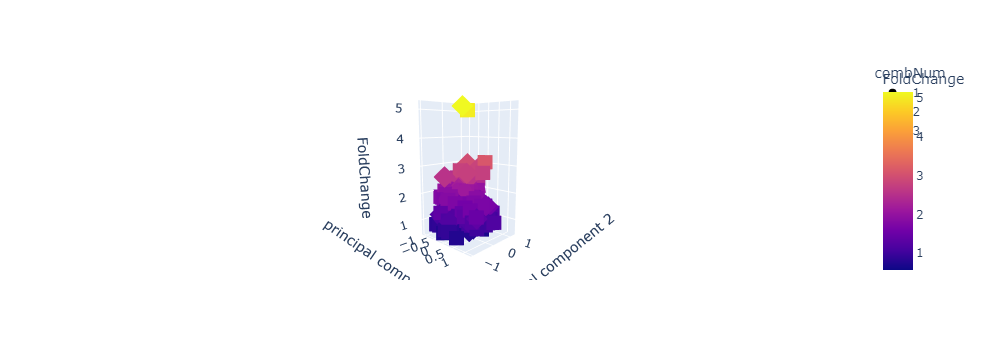

In [40]:
fig = px.scatter_3d(finalDf, x='principal component 1', y='principal component 2', z='FoldChange',
              color='FoldChange', symbol='combNum')
fig.show()

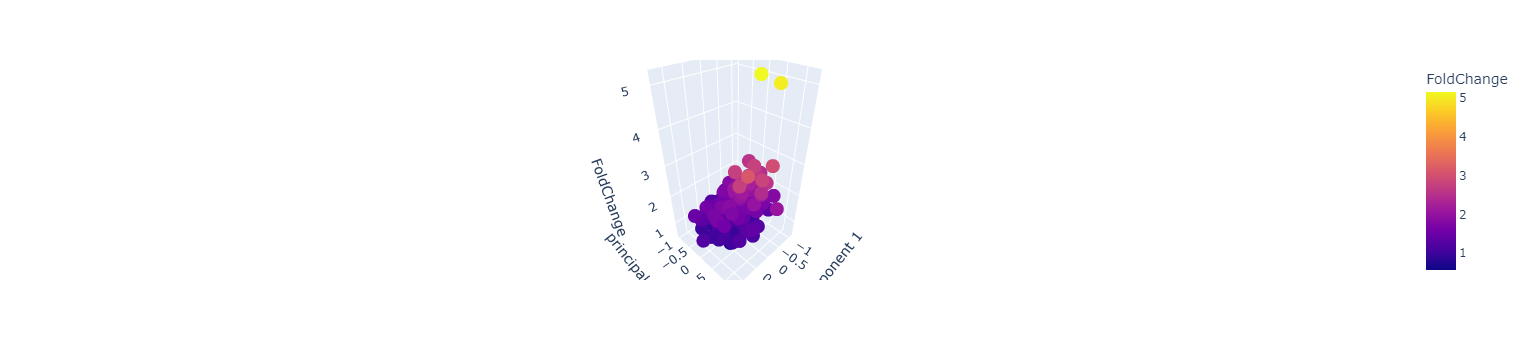

In [41]:
fig = px.scatter_3d(finalDf, x='principal component 1', y='principal component 2', z='FoldChange',
              color='FoldChange')
fig.show()

In [ ]:
fig = px.scatter_3d(finalDf, x='principal component 1', y='principal component 2', z='FoldChange',
              symbol='combNum')
fig.show()